# Random Walk on MaxCut Problem

In this notebook, we demonstrate Random Walk on the MaxCut problem.

1. [Introduction](#intro)
3. [Random Walk Initialization](#siminit)
4. [Testing](#testing)

<a id='intro'></a>
## 1. Introduction

### Imports

In [ ]:
%pip install numpy
%pip install networkx
%pip install torch
%pip install pandas
%pip install tqdm

In [ ]:
import copy
import time
import networkx as nx
import numpy as np
from typing import List, Union
import random
from util import read_nxgraph
from util import obj_maxcut

import sys

<a id='siminit'></a>
## 3. Random Walk Initialization

In [ ]:
def random_walk(init_solution: Union[List[int], np.array], num_steps: int, max_num_flips: int, graph: nx.Graph) -> (int, Union[List[int], np.array], List[int]):
    print('random_walk')
    start_time = time.time()
    curr_solution = copy.deepcopy(init_solution)
    init_score = obj_maxcut(init_solution, graph)
    num_nodes = len(curr_solution)
    scores = []
    nodes = list(range(num_nodes))
    if max_num_flips > num_nodes:
        max_num_flips = num_nodes
    for i in range(num_steps):
        # select nodes randomly
        traversal_scores = []
        traversal_solutions = []
        for j in range(1, max_num_flips + 1):
            selected_nodes = random.sample(nodes, j)
            new_solution = copy.deepcopy(curr_solution)
            new_solution = np.array(new_solution)
            new_solution[selected_nodes] = (new_solution[selected_nodes] + 1) % 2
            new_solution = new_solution.tolist()
            # calc the obj
            new_score = obj_maxcut(new_solution, graph)
            traversal_scores.append(new_score)
            traversal_solutions.append(new_solution)
        best_traversal_score = max(traversal_scores)
        index = traversal_scores.index(best_traversal_score)
        best_traversal_solution = traversal_solutions[index]
        if len(scores) == 0 or (len(scores) >= 1 and best_traversal_score >= scores[-1]):
            curr_solution = best_traversal_solution
            scores.append(best_traversal_score)
    score = max(scores)
    print("score, init_score of random_walk", score, init_score)
    print("scores: ", scores)
    print("solution: ", curr_solution)
    running_duration = time.time() - start_time
    print('running_duration: ', running_duration)
    return score, curr_solution, scores


<a id='testing'></a>
## 4. Testing
Here are descriptions of the graphs in our data set, see which ones random walk can feasibly run on
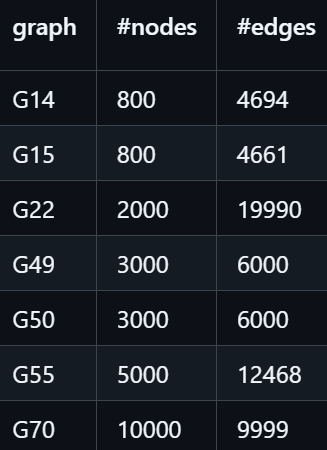

In [ ]:
if __name__ == '__main__':
    # read data
    graph = read_nxgraph('data/gset_14.txt')

    # run alg
    init_solution = list(np.random.randint(0, 2, graph.number_of_nodes()))
    rw_score, rw_solution, rw_scores = random_walk(init_solution=init_solution, num_steps=1000, max_num_flips=20, graph=graph)


<a id='benchmark'></a>
## 4. Benchmarked Results

